## Importing libraries

In [140]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

## Importing datasets

In [142]:
train_data = pd.read_csv("train.csv")
gender_submission = pd.read_csv("gender_submission.csv")
test_data = pd.read_csv("test.csv")

train_data.head(50) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Data Dictionary

| Feature     | Description                                                |
|-------------|------------------------------------------------------------|
| **Survived**| Survival (0 = No, 1 = Yes)                                |
| **pclass**  | Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)                  |
| **sibsp**   | Number of siblings/spouses aboard the Titanic             |
| **parch**   | Number of parents/children aboard the Titanic             |
| **ticket**  | Ticket number                                             |
| **cabin**   | Cabin number                                              |
| **embarked**| Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) |

### Dataset Overview

- **Total Rows**: 891
- **Total Columns**: 12


In [144]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Missing Values

- The **Age** value is missing for many rows. Out of 891 rows, the Age value is present in only 714 rows.
- **Cabin** values are also missing in many rows, with only 204 out of 891 rows having Cabin values.ues.

In [146]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [147]:
# number of missed data
test_data.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Drop Columns
-in trainning there 687 missed value in 'cabin'.             
-we can drop these columns in test and train .

In [149]:
train_data.drop('Cabin', axis=1, inplace=True)
train_data.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


#### Do the same thing in test

In [151]:
test_data.drop('Cabin', axis=1, inplace=True)
test_data.head(30)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S


#### we will make function to plot how survived from each category

In [153]:
# we would work in function like this
survived=train_data[train_data['Survived']==1]['Sex'].value_counts()
survived

Sex
female    233
male      109
Name: count, dtype: int64

In [154]:

def bar_chart(category_name):
    survived = train_data[train_data['Survived'] == 1][category_name].value_counts()
    dead = train_data[train_data['Survived'] == 0][category_name].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar',stacked=True,figsize=(10, 5))


    

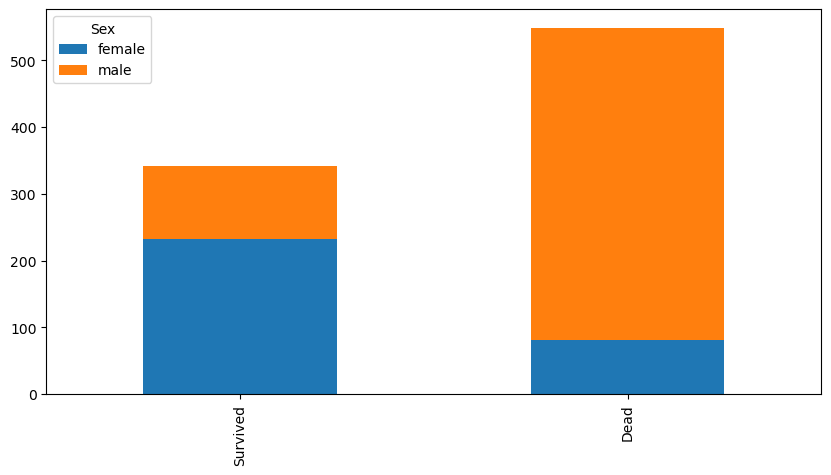

In [155]:
bar_chart('Sex')

### Here we wanted to apear all categories in the same graph as sub plot

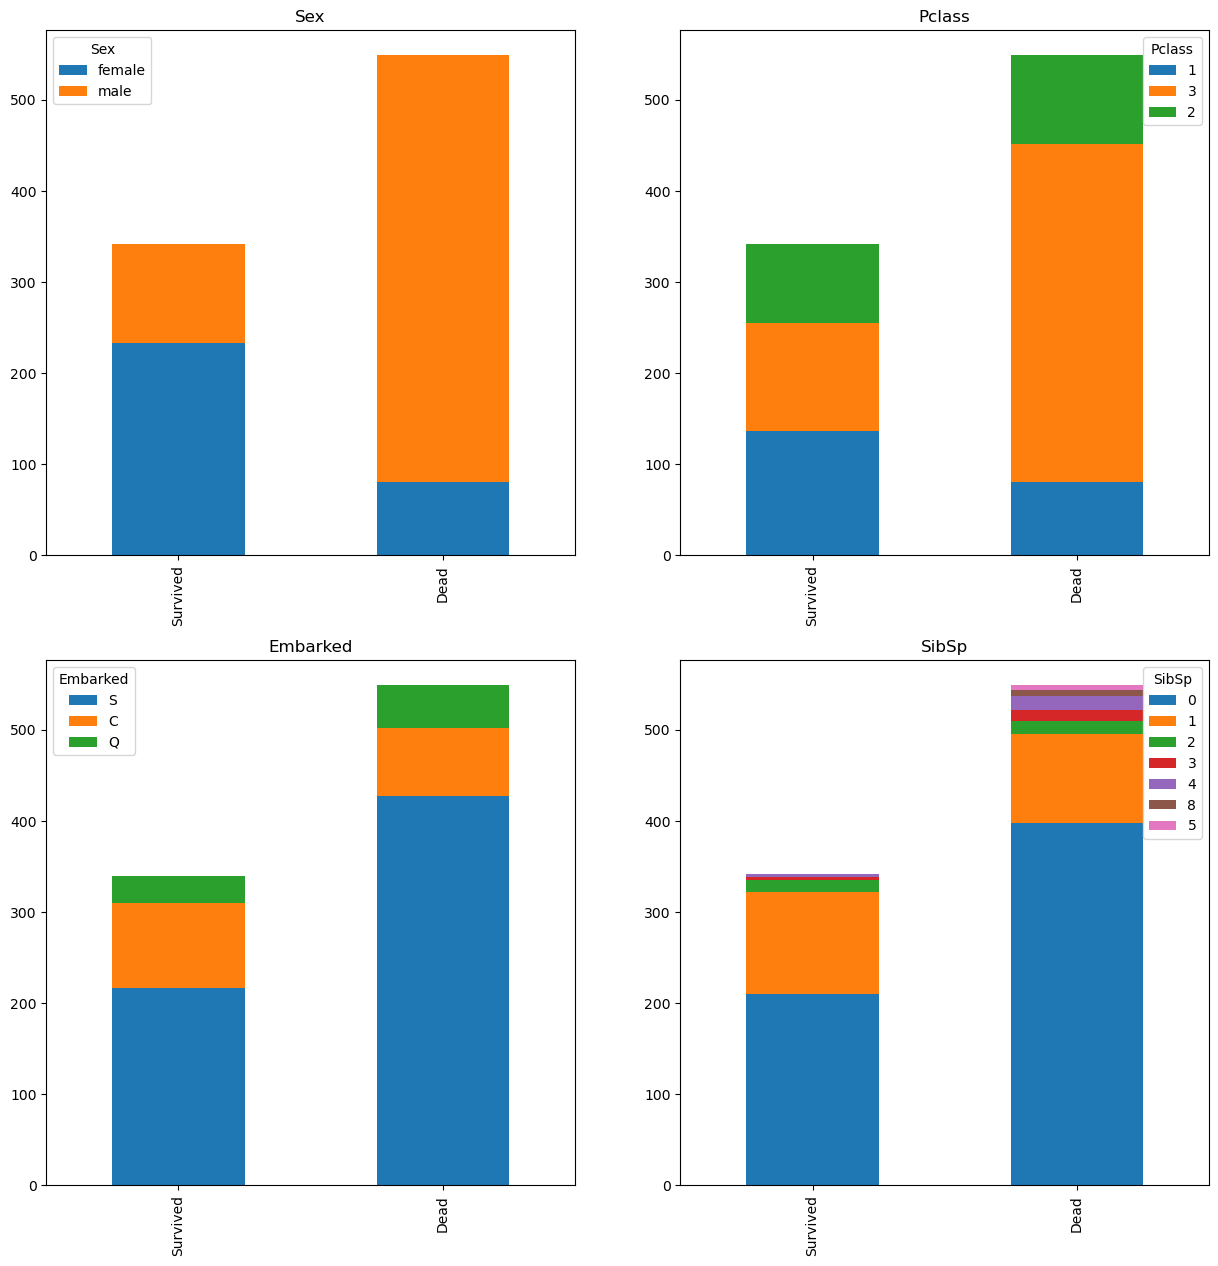

In [157]:
def bar_chart(categories):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))  # Create a 3x3 grid of subplots
    axes = axes.flatten()  # Flatten the 2D array of axes to make it easier to iterate

    for idx, category_name in enumerate(categories):
        if idx >= len(axes):
            break  # If there are more categories than subplots, stop plotting
        
        survived = train_data[train_data['Survived'] == 1][category_name].value_counts()
        dead = train_data[train_data['Survived'] == 0][category_name].value_counts()
        df = pd.DataFrame([survived, dead])
        df.index = ['Survived', 'Dead']
        
        df.plot(kind='bar', stacked=True, ax=axes[idx], title=category_name)
    
    # plt.tight_layout()
    # plt.show()

# Assuming train_data is your DataFrame and already defined
categories = ['Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch']
bar_chart(categories)

 ### By using age we can predict the age mr miss and whatever
#### Regular Expression Summary

The following regular expression is used to identify titles (e.g., Mr, Miss) within a string
- **(space)**: Ensures that the title is preceded by a space, indicating that it is part of a larger string (e.g., a name).
- **[A-Za-z]+**: Matches one or more uppercase or lowercase letters, forming a sequence of letters.
- **([A-Za-z]+)**: The parentheses capture this sequence as a group.
- **\.**: Matches a literal period. The backslash escapes the period, as it normally matches any character in regex.

This regex can ultimately help in predicting titles based on the context of a name.
:



In [159]:
train_test_data = [train_data, test_data] # combining train and test dataset

for dataset in train_test_data:
    #expnad false to which is then assigned to the Title column of dataset
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train_data

<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
C:\Users\karim\AppData\Local\Temp\ipykernel_4376\2359820347.py:5: SyntaxWarning: invalid escape sequence '\.'
  dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr


In [160]:
train_data['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

Title map   # make each title have number 
                
Mr : 0    
Miss :     1
Mrs:     2
Others: 3

In [162]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [163]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0


#### We make each name's title has number now name is not necessary

In [165]:
# delete unnecessary feature from dataset
train_data.drop('Name', axis=1, inplace=True)
test_data.drop('Name', axis=1, inplace=True)

#### We can give sex number like title

In [167]:
sex_dic={
    'male' :0,
    'female':1    
}
#this for loop to replace test and train
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_dic)


In [168]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [169]:
embarked_dic={
    'S' :0,
    'C':1 ,
    'Q':2
}
#this for loop to replace test and train
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_dic)

In [170]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    int64  
 10  Title        891 non-null    int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 76.7+ KB


In [171]:
train_dataDF=pd.DataFrame(train_data)
train_data['Embarked'].astype(int)

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 891, dtype: int32

# Filling Missing Ages with Median Age by Title

In this section, we will fill in the missing age values in our datasets (`train_data` and `test_data`) by using the median age for each passenger title (Mr, Mrs, Miss, Others). This approach helps in maintaining the dataset's integrity without introducing significant bias.

## Step 1: Group by Title and Calculate Median Age

We will first group the `train_data` by the `Title` column and calculate the median age for each title. This will allow us to replace missing age values with the appropriate median.

```python
# Display the median age for each title in the training data
median_ages = train_data.groupby("Title")["Age"].transform("median")
median_ages


In [173]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train_data["Age"] = train_data["Age"].fillna(train_data.groupby("Title")["Age"].transform("median"))
test_data["Age"] = test_data["Age"].fillna(test_data.groupby("Title")["Age"].transform("median"))

train_data.groupby("Title")["Age"].transform("median")
train_data.head(30)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,0,2
4,5,0,3,0,35.0,0,0,373450,8.0500,0,0
5,6,0,3,0,30.0,0,0,330877,8.4583,2,0
6,7,0,1,0,54.0,0,0,17463,51.8625,0,0
7,8,0,3,0,2.0,3,1,349909,21.0750,0,3
8,9,1,3,1,27.0,0,2,347742,11.1333,0,2
9,10,1,2,1,14.0,1,0,237736,30.0708,1,2


In [174]:

print("Train Data Columns:", train_data.columns)

# Drop specified features, ignoring errors if they don't exist
features_drop = ['Ticket', 'SibSp', 'Parch', 'Cabin']
train_data = train_data.drop(features_drop, axis=1, errors='ignore')
test_data = test_data.drop(features_drop, axis=1, errors='ignore')

# Optionally drop 'PassengerId' if it exists
train_data = train_data.drop(['PassengerId'], axis=1, errors='ignore')


Train Data Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Title'],
      dtype='object')


In [175]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    int64  
 6   Title     891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [176]:
train_dataN = train_data.drop('Survived', axis=1)
target = train_data['Survived']

train_data.shape, target.shape

((891, 7), (891,))

### Modelling

In [178]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

#### Cross Validation (K-fold)

In [180]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [181]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_dataN, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.7        0.79775281 0.71910112 0.66292135 0.68539326 0.74157303
 0.75280899 0.73033708 0.69662921 0.75280899]


In [182]:
# kNN Score
round(np.mean(score)*100, 2)

72.39